In [ ]:
# inspiration from the tutorial "How do Do Data Exploration" by Misra Turp on Youtube
##Source credits: Misra Turp, City of Seattle Open Data Portal

In [ ]:
# PART 1: DATA EXPLORATION
#import libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
# read in csv from source
tree_census = pd.read_csv('C:\\Users\\User\\Desktop\\Gis data\\Python Data\\Seattle_Trees2.csv')
tree_census

In [4]:
#clean the data and only include the specific columns we want to look at
#look at all columns in the dataset currently
tree_census.columns

#create a subset of the original table with only relevant columns we want to look at
tree_subset = tree_census[['X', 'Y', 'CONDITION', 'PRIMARYDISTRICTCD', 'OWNERSHIP', 'GREEN_FACTOR', 'WIRES', 'CABLED',
       'CLEARANCE_PROBLEM', 'SPACETYPE', 'SITETYPE', 'GROWSPACE', 'DIAM',
       'CONDITION_RATING', 'COMMON_NAME', 'TREEHEIGHT','LAST_VERIFY_DATE', 'PLANTED_DATE', 'SHAPE_LNG', 'SHAPE_LAT']]
tree_subset

,X,Y,CONDITION,PRIMARYDISTRICTCD,OWNERSHIP,GREEN_FACTOR,WIRES,CABLED,CLEARANCE_PROBLEM,SPACETYPE,SITETYPE,GROWSPACE,DIAM,CONDITION_RATING,COMMON_NAME,TREEHEIGHT,LAST_VERIFY_DATE,PLANTED_DATE,SHAPE_LNG,SHAPE_LAT
0,-122.344182,47.611504,,DISTRICT7,PRIV,N,N,N,N,GRAVEL,,4,10,3.0,Katsura Tree,0.0,2018/06/19 00:00:00+00,1991/08/01 00:00:00+00,-122.344182,47.611504
1,-122.336425,47.613337,,DISTRICT7,PRIV,N,N,N,N,SOIL,PIT,6,15,5.0,Littleleaf Linden,0.0,2022/06/29 00:00:00+00,1991/07/17 00:00:00+00,-122.336425,47.613337
2,-122.350394,47.681762,,DISTRICT6,PRIV,N,Y,N,N,OTHER,,9,1,4.0,Orchard (Common) Apple,0.0,NaN,1992/05/26 00:00:00+00,-122.350394,47.681762
3,-122.370461,47.688106,,DISTRICT6,PRIV,N,Y,N,N,BRICK,,8,7,1.0,Common (Euro) Mountain Ash,0.0,2018/08/15 00:00:00+00,1992/05/19 00:00:00+00,-122.370461,47.688106
4,-122.313307,47.617664,,DISTRICT3,PRIV,N,N,N,N,GRASS,,10,37,3.0,Douglas Fir,0.0,2019/09/03 00:00:00+00,1990/09/19 00:00:00+00,-122.313307,47.617664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173801,-122.341880,47.657966,,DISTRICT4,PRIV,Y,Y,N,N,,,8,2,4.0,Cimmaron Green Ash,0.0,2023/04/14 00:00:00+00,2022/04/14 00:00:00+00,-122.341880,47.657966
173802,-122.327142,47.551003,,DISTRICT2,PRIV,N,Y,N,N,,,10,2,4.0,Little Gem Magnolia,0.0,2023/04/26 00:00:00+00,2023/04/26 00:00:00+00,-122.327142,47.551003
173803,-122.327191,47.550993,,DISTRICT2,PRIV,N,Y,N,N,,,10,2,4.0,Little Gem Magnolia,0.0,2023/04/26 00:00:00+00,2023/04/26 00:00:00+00,-122.327191,47.550993
173804,-122.327240,47.550977,,DISTRICT2,PRIV,N,Y,N,N,,,10,2,4.0,Little Gem Magnolia,0.0,2023/04/26 00:00:00+00,2023/04/26 00:00:00+00,-122.327240,47.550977


In [5]:
#see how many null or empty/missing values there are in each column
tree_subset.isna().sum() 

X                        0
Y                        0
CONDITION                0
PRIMARYDISTRICTCD        0
OWNERSHIP                0
GREEN_FACTOR             0
WIRES                    0
CABLED                   0
CLEARANCE_PROBLEM       27
SPACETYPE                0
SITETYPE              7473
GROWSPACE                0
DIAM                     0
CONDITION_RATING         0
COMMON_NAME              0
TREEHEIGHT            1225
LAST_VERIFY_DATE     26004
PLANTED_DATE          2004
SHAPE_LNG                0
SHAPE_LAT                0
dtype: int64

In [6]:
#checking the NaN values for TREEHEIGHT
#It looks like most of the trees without height data have not been verified in over 10 years.
tree_subset[tree_subset['TREEHEIGHT'].isna()]


,X,Y,CONDITION,PRIMARYDISTRICTCD,OWNERSHIP,GREEN_FACTOR,WIRES,CABLED,CLEARANCE_PROBLEM,SPACETYPE,SITETYPE,GROWSPACE,DIAM,CONDITION_RATING,COMMON_NAME,TREEHEIGHT,LAST_VERIFY_DATE,PLANTED_DATE,SHAPE_LNG,SHAPE_LAT
15,-122.348500,47.624312,,DISTRICT7,PRIV,N,N,N,N,OTHER,,100,34,3.0,London Plane (Tree),NaN,2008/12/31 00:00:00+00,NaN,-122.348500,47.624312
74,-122.352600,47.620255,,DISTRICT7,SEAC,N,N,N,N,OTHER,,25,4,4.0,Dogwood,NaN,2008/12/31 00:00:00+00,NaN,-122.352600,47.620255
101,-122.348300,47.620908,,DISTRICT7,SEAC,N,N,N,N,OTHER,,4,24,4.0,London Plane (Tree),NaN,2008/12/31 00:00:00+00,NaN,-122.348300,47.620908
442,-122.350100,47.620709,,DISTRICT7,SEAC,N,N,N,N,GRATE,PIT,8,3,2.0,Raywood Narrowleaf Ash,NaN,2008/12/31 00:00:00+00,NaN,-122.350100,47.620709
464,-122.352800,47.621384,,DISTRICT7,SEAC,N,N,N,N,OTHER,,10,26,4.0,London Plane (Tree),NaN,2008/12/31 00:00:00+00,NaN,-122.352800,47.621384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81659,-122.345150,47.690474,,DISTRICT5,SDOT,N,Y,N,N,PAVERS,,4,3,3.0,Carriere (Lavallei) Hawthorn,NaN,NaN,NaN,-122.345150,47.690474
81660,-122.345380,47.690483,,DISTRICT5,SDOT,N,Y,N,N,PAVERS,,4,6,5.0,Carriere (Lavallei) Hawthorn,NaN,NaN,NaN,-122.345380,47.690483
81662,-122.345248,47.690470,,DISTRICT5,SDOT,N,Y,N,N,PAVERS,,4,4,4.0,Carriere (Lavallei) Hawthorn,NaN,NaN,NaN,-122.345248,47.690470
81664,-122.345425,47.690634,,DISTRICT5,SDOT,N,N,N,N,PAVERS,,4,7,4.0,Carriere (Lavallei) Hawthorn,NaN,NaN,NaN,-122.345425,47.690634


In [7]:
tree_subset.describe()

,X,Y,GROWSPACE,DIAM,CONDITION_RATING,TREEHEIGHT,SHAPE_LNG,SHAPE_LAT
count,173806.000000,173806.000000,173806.000000,173806.000000,173806.000000,172581.000000,173806.000000,173806.000000
mean,-122.337359,47.626490,11.929939,8.615123,3.706270,0.095804,-122.337359,47.626490
std,0.037715,0.056098,19.135421,7.414656,0.826722,2.754959,0.037715,0.056098
min,-122.419024,47.495836,0.000000,0.000000,1.000000,0.000000,-122.419024,47.495836
25%,-122.368469,47.577689,5.000000,3.000000,3.000000,0.000000,-122.368469,47.577689
50%,-122.337114,47.637382,8.000000,7.000000,4.000000,0.000000,-122.337114,47.637382
75%,-122.307086,47.672868,10.000000,12.000000,4.000000,0.000000,-122.307086,47.672868
max,-122.238583,47.734069,810.000000,187.000000,5.000000,148.000000,-122.238583,47.734069


<Axes: >

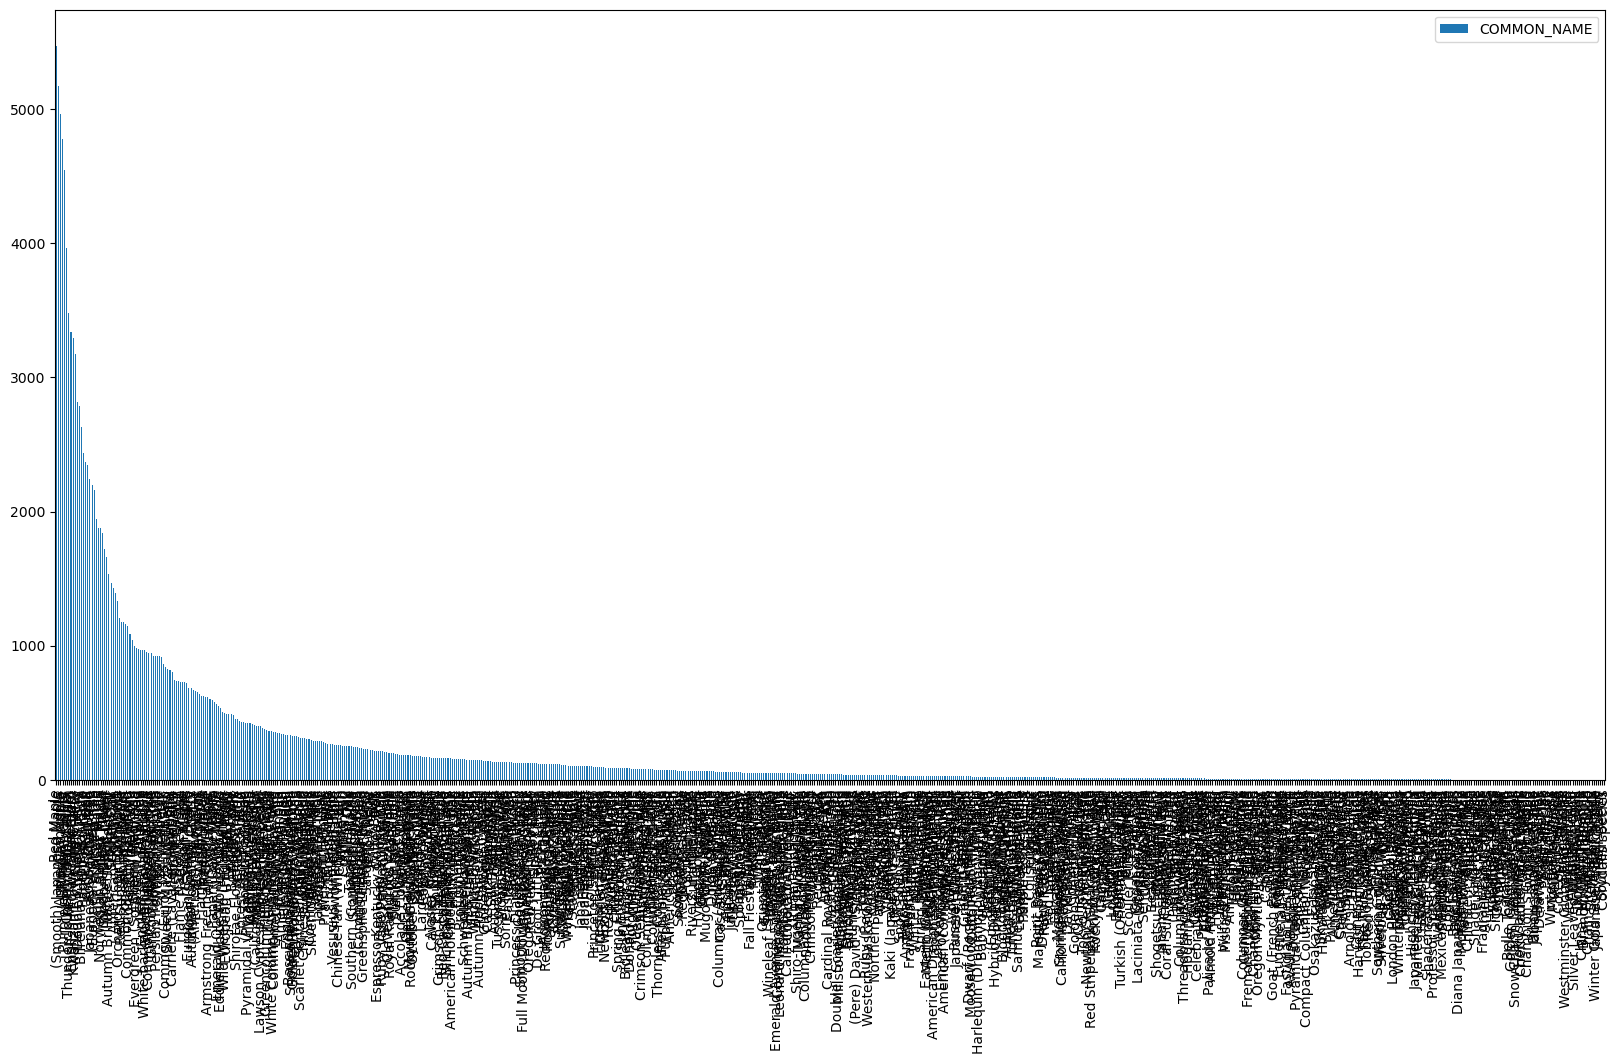

In [95]:
#plotting the trees by time to see which species are most common
pd.DataFrame(tree_subset['COMMON_NAME'].value_counts()).plot(kind='bar', figsize=(20,10))

In [96]:
#bar chart is way too busy to read the data accurately. Let's try a different method to find the most common tree types...
tree_subset['COMMON_NAME'].value_counts()

Red Maple                       5467
(Smooth) Japanese Maple         5169
Apple/Crabapple                 4960
Norway Maple                    4778
Purpleleaf Plum variety         4548
                                ... 
Winter Gold Snake Bark Maple       1
Japanese Angelica Tree             1
Fuji Cherry                        1
Southern-Beech                     1
Corydalis species                  1
Name: COMMON_NAME, Length: 736, dtype: int64

In [10]:
#find the largest trees by diameter (in inches)
big_trees = tree_subset[tree_subset['DIAM']>50]
big_trees

,X,Y,CONDITION,PRIMARYDISTRICTCD,OWNERSHIP,GREEN_FACTOR,WIRES,CABLED,CLEARANCE_PROBLEM,SPACETYPE,SITETYPE,GROWSPACE,DIAM,CONDITION_RATING,COMMON_NAME,TREEHEIGHT,LAST_VERIFY_DATE,PLANTED_DATE,SHAPE_LNG,SHAPE_LAT
26,-122.397791,47.672292,,DISTRICT6,PRIV,N,N,N,N,GRASS,,12,58,5.0,"Lawson Cypress, Port Orford Cedar",0.0,2017/09/07 00:00:00+00,1991/09/12 00:00:00+00,-122.397791,47.672292
828,-122.411968,47.575795,,DISTRICT1,PRIV,N,N,N,N,GRASS,,13,59,4.0,Bigleaf Maple,0.0,2019/05/26 00:00:00+00,1992/10/07 00:00:00+00,-122.411968,47.575795
1289,-122.277952,47.553354,,DISTRICT2,PRIV,N,Y,N,N,GRASS,,4,61,4.0,Western Red Cedar,0.0,2022/07/13 00:00:00+00,1991/08/19 00:00:00+00,-122.277952,47.553354
2582,-122.360450,47.629740,,DISTRICT7,PRIV,N,N,N,N,GRASS,,9,90,3.0,Lombardy Poplar,0.0,2021/09/03 00:00:00+00,1991/08/29 00:00:00+00,-122.360450,47.629740
2620,-122.312529,47.709789,,DISTRICT5,PRIV,N,N,N,N,OTHER,,99,60,2.0,Bigleaf Maple,0.0,2019/08/02 00:00:00+00,1992/09/18 00:00:00+00,-122.312529,47.709789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169085,-122.359415,47.628644,,DISTRICT7,PRIV,N,N,N,N,,,0,53,4.0,Deodar Cedar,0.0,2021/09/07 00:00:00+00,1991/09/07 00:00:00+00,-122.359415,47.628644
169685,-122.355740,47.637072,,DISTRICT7,PRIV,N,Y,N,N,GRASS,,5,60,5.0,Giant Sequoia,0.0,2022/08/15 00:00:00+00,1985/09/14 00:00:00+00,-122.355740,47.637072
169908,-122.355923,47.636003,,DISTRICT7,PRIV,N,Y,N,N,GRASS,,8,54,3.0,Western Red Cedar,0.0,2021/09/14 00:00:00+00,1985/09/14 00:00:00+00,-122.355923,47.636003
172899,-122.358064,47.645043,,DISTRICT7,PRIV,N,Y,N,N,,,6,55,4.0,Western Red Cedar,0.0,2022/09/02 00:00:00+00,1991/01/01 00:00:00+00,-122.358064,47.645043


<Axes: >

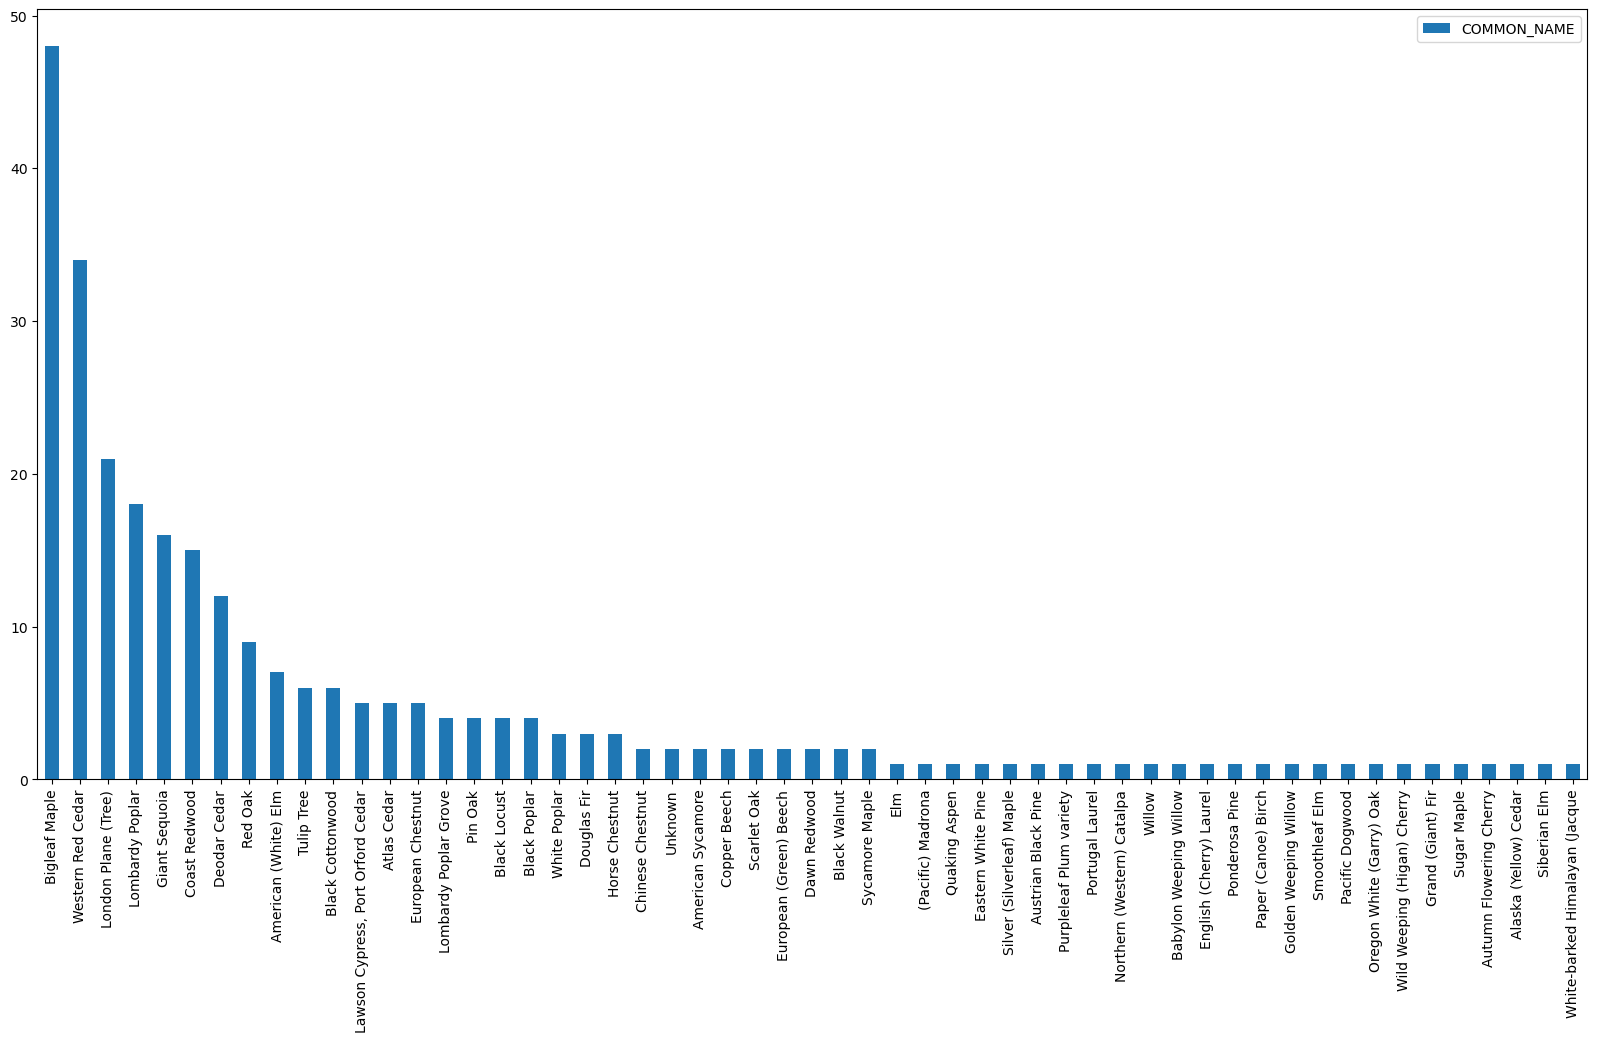

In [11]:
#plotting the big trees to see which species are the largest
pd.DataFrame(big_trees['COMMON_NAME'].value_counts()).plot(kind='bar', figsize=(20,10))

<Axes: xlabel='COMMON_NAME', ylabel='DIAM'>

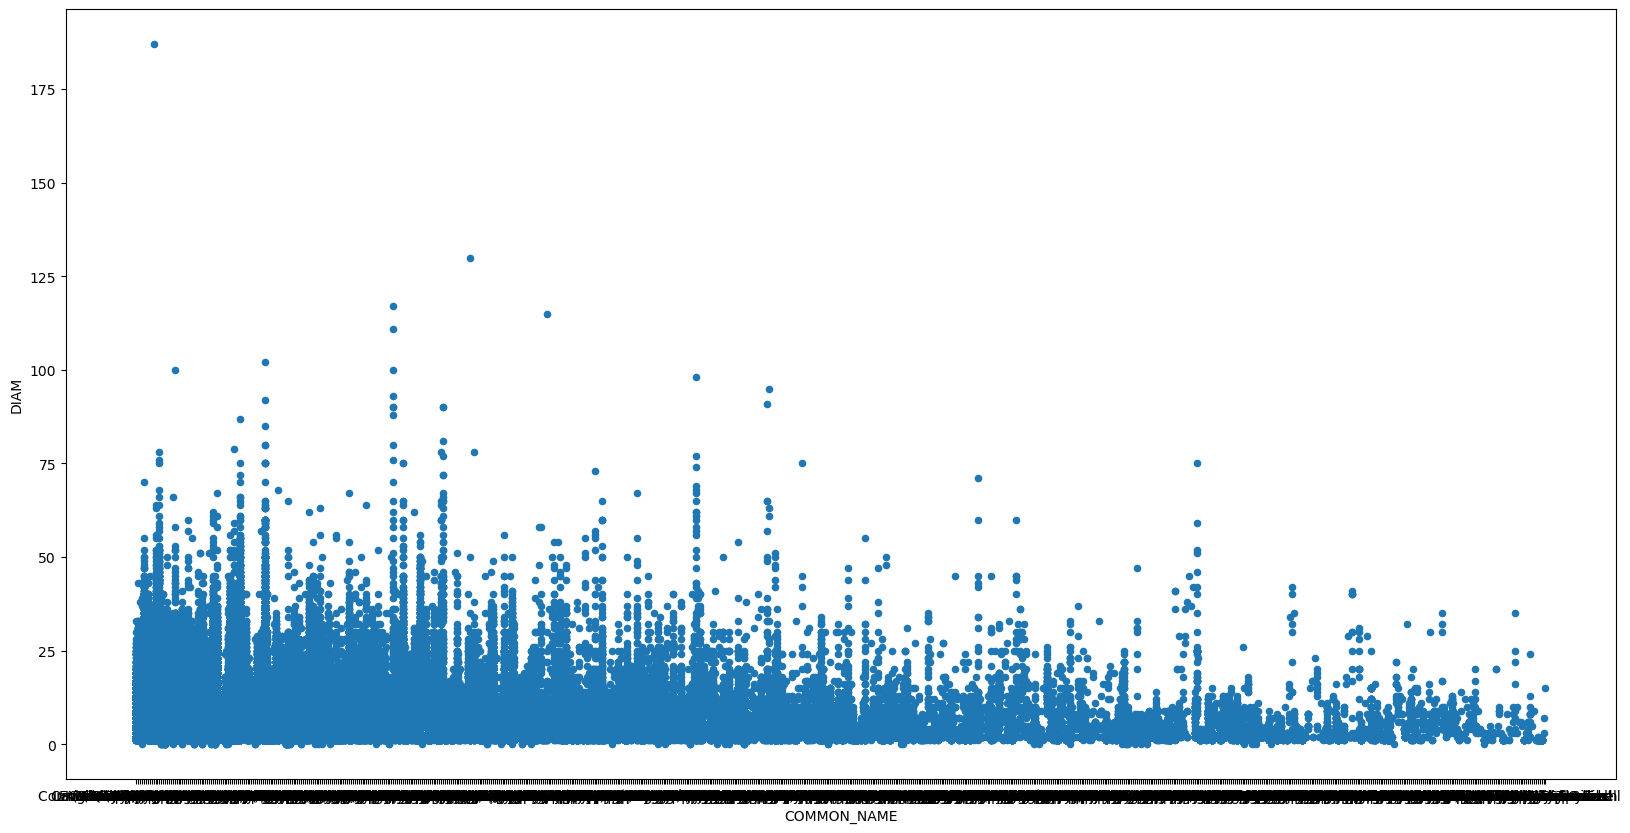

In [12]:
#create scatter plot to see overall distribution of tree diameter size
tree_subset[['COMMON_NAME', 'DIAM']].plot(kind='scatter', x='COMMON_NAME', y='DIAM', figsize=(20,10))
#looks like most trees are under 120in in diameter, with the largest being over 180 inches. Is this a mistake in the dataset or just an outlier?

<Axes: xlabel='TREEHEIGHT', ylabel='DIAM'>

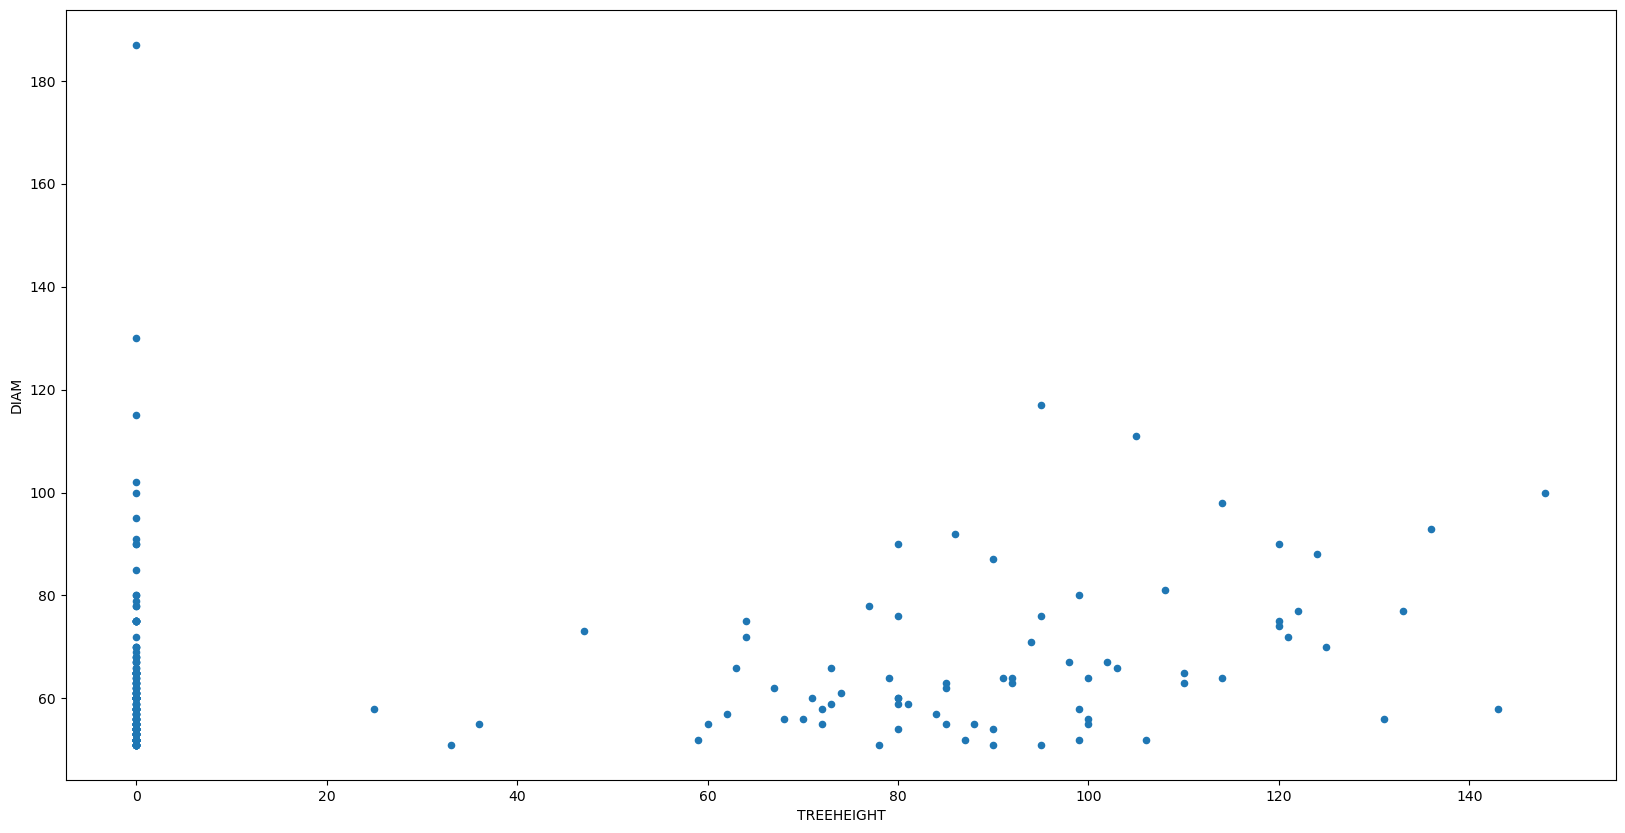

In [100]:
#create scatter plot to see overall distribution of tree diamter vs tree height
big_trees[['TREEHEIGHT', 'DIAM']].plot(kind='scatter', x='TREEHEIGHT', y='DIAM', figsize=(20,10))
#lots of trees at a height of 0 but with wide diameters, which indicates to me that the actual height was not measured. 

<Axes: >

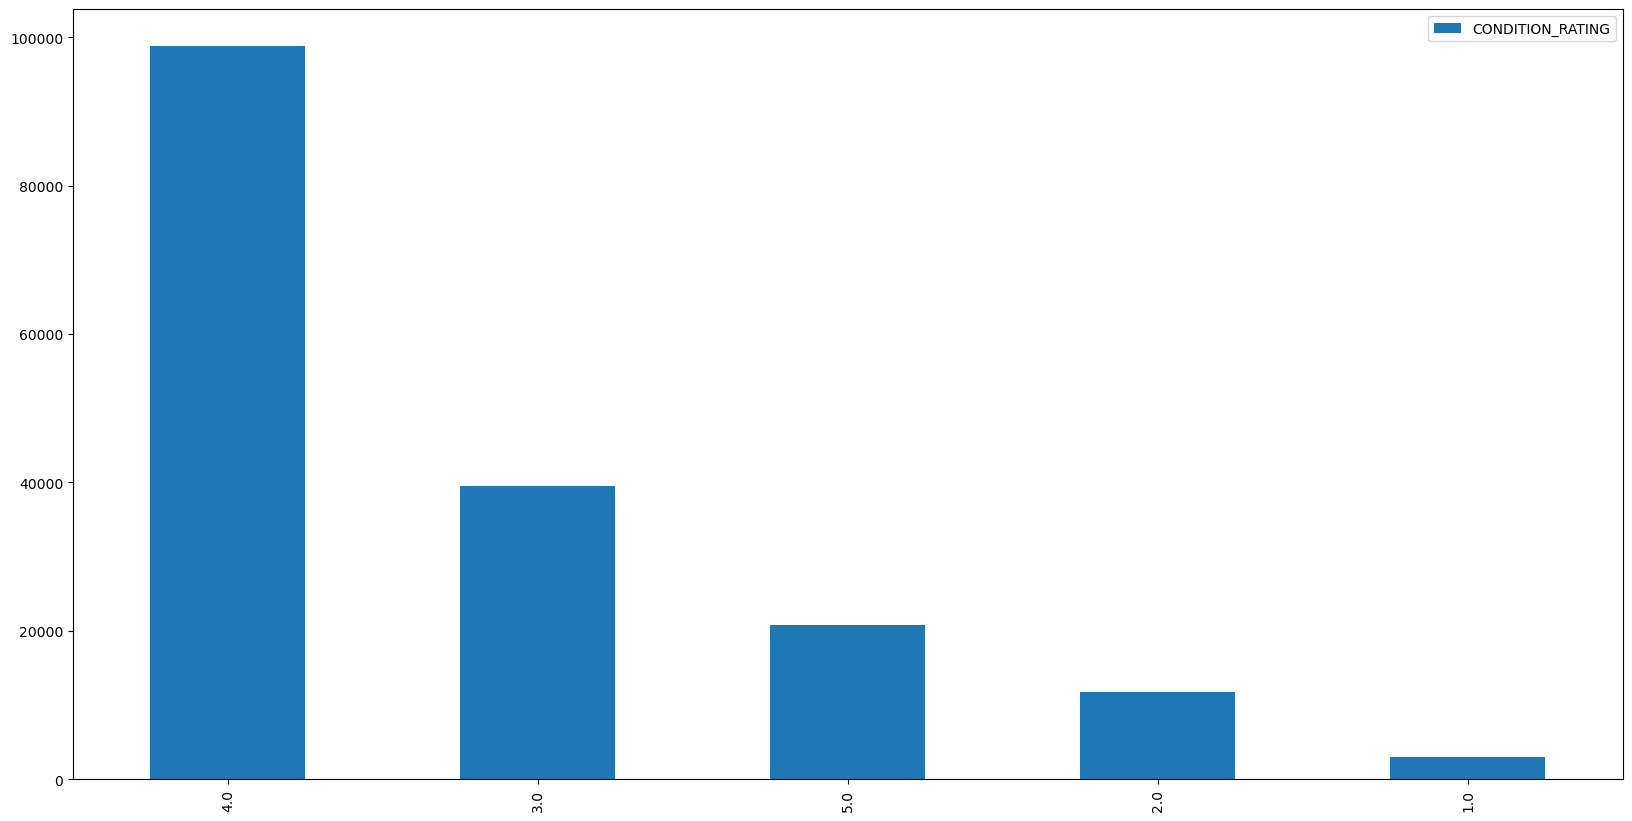

In [101]:
#seeing the distribution of tree conditions across the dataset, where 1 = poor condition and 5 = excellent condition
pd.DataFrame(tree_subset['CONDITION_RATING'].value_counts()).plot(kind='bar', figsize=(20,10))

In [102]:
#PART 2: CLEANING THE DATA

In [103]:
#see count of condition ratings of trees
tree_subset['CONDITION_RATING'].value_counts()
#there seem to be 3,276 trees that do not have an assigned condition rating. 

4.0    98844
3.0    39463
5.0    20781
2.0    11784
1.0     2934
Name: CONDITION_RATING, dtype: int64

In [13]:
#what other columns are missing values?
tree_subset.isna().sum() 
#tree height is something important to our analyses. let's explore!

X                        0
Y                        0
CONDITION                0
PRIMARYDISTRICTCD        0
OWNERSHIP                0
GREEN_FACTOR             0
WIRES                    0
CABLED                   0
CLEARANCE_PROBLEM       27
SPACETYPE                0
SITETYPE              7473
GROWSPACE                0
DIAM                     0
CONDITION_RATING         0
COMMON_NAME              0
TREEHEIGHT            1225
LAST_VERIFY_DATE     26004
PLANTED_DATE          2004
SHAPE_LNG                0
SHAPE_LAT                0
dtype: int64

In [14]:
tree_subset.dtypes

X                    float64
Y                    float64
CONDITION             object
PRIMARYDISTRICTCD     object
OWNERSHIP             object
GREEN_FACTOR          object
WIRES                 object
CABLED                object
CLEARANCE_PROBLEM     object
SPACETYPE             object
SITETYPE              object
GROWSPACE              int64
DIAM                   int64
CONDITION_RATING     float64
COMMON_NAME           object
TREEHEIGHT           float64
LAST_VERIFY_DATE      object
PLANTED_DATE          object
SHAPE_LNG            float64
SHAPE_LAT            float64
dtype: object

In [15]:
#locating the missing tree height values
tree_subset[tree_subset['TREEHEIGHT'].isna()]
#seems like lots of missing tree heights are from trees that haven't been verified in a long time. 

,X,Y,CONDITION,PRIMARYDISTRICTCD,OWNERSHIP,GREEN_FACTOR,WIRES,CABLED,CLEARANCE_PROBLEM,SPACETYPE,SITETYPE,GROWSPACE,DIAM,CONDITION_RATING,COMMON_NAME,TREEHEIGHT,LAST_VERIFY_DATE,PLANTED_DATE,SHAPE_LNG,SHAPE_LAT
15,-122.348500,47.624312,,DISTRICT7,PRIV,N,N,N,N,OTHER,,100,34,3.0,London Plane (Tree),NaN,2008/12/31 00:00:00+00,NaN,-122.348500,47.624312
74,-122.352600,47.620255,,DISTRICT7,SEAC,N,N,N,N,OTHER,,25,4,4.0,Dogwood,NaN,2008/12/31 00:00:00+00,NaN,-122.352600,47.620255
101,-122.348300,47.620908,,DISTRICT7,SEAC,N,N,N,N,OTHER,,4,24,4.0,London Plane (Tree),NaN,2008/12/31 00:00:00+00,NaN,-122.348300,47.620908
442,-122.350100,47.620709,,DISTRICT7,SEAC,N,N,N,N,GRATE,PIT,8,3,2.0,Raywood Narrowleaf Ash,NaN,2008/12/31 00:00:00+00,NaN,-122.350100,47.620709
464,-122.352800,47.621384,,DISTRICT7,SEAC,N,N,N,N,OTHER,,10,26,4.0,London Plane (Tree),NaN,2008/12/31 00:00:00+00,NaN,-122.352800,47.621384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81659,-122.345150,47.690474,,DISTRICT5,SDOT,N,Y,N,N,PAVERS,,4,3,3.0,Carriere (Lavallei) Hawthorn,NaN,NaN,NaN,-122.345150,47.690474
81660,-122.345380,47.690483,,DISTRICT5,SDOT,N,Y,N,N,PAVERS,,4,6,5.0,Carriere (Lavallei) Hawthorn,NaN,NaN,NaN,-122.345380,47.690483
81662,-122.345248,47.690470,,DISTRICT5,SDOT,N,Y,N,N,PAVERS,,4,4,4.0,Carriere (Lavallei) Hawthorn,NaN,NaN,NaN,-122.345248,47.690470
81664,-122.345425,47.690634,,DISTRICT5,SDOT,N,N,N,N,PAVERS,,4,7,4.0,Carriere (Lavallei) Hawthorn,NaN,NaN,NaN,-122.345425,47.690634


In [17]:
selected_columns = tree_subset[['TREEHEIGHT', 'LAST_VERIFY_DATE', 'PLANTED_DATE', 'DIAM']]
selected_columns

,TREEHEIGHT,LAST_VERIFY_DATE,PLANTED_DATE,DIAM
0,0.0,2018/06/19 00:00:00+00,1991/08/01 00:00:00+00,10
1,0.0,2022/06/29 00:00:00+00,1991/07/17 00:00:00+00,15
2,0.0,NaN,1992/05/26 00:00:00+00,1
3,0.0,2018/08/15 00:00:00+00,1992/05/19 00:00:00+00,7
4,0.0,2019/09/03 00:00:00+00,1990/09/19 00:00:00+00,37
...,...,...,...,...
173801,0.0,2023/04/14 00:00:00+00,2022/04/14 00:00:00+00,2
173802,0.0,2023/04/26 00:00:00+00,2023/04/26 00:00:00+00,2
173803,0.0,2023/04/26 00:00:00+00,2023/04/26 00:00:00+00,2
173804,0.0,2023/04/26 00:00:00+00,2023/04/26 00:00:00+00,2


In [18]:
selected_columns.isna().sum() 

TREEHEIGHT           1225
LAST_VERIFY_DATE    26004
PLANTED_DATE         2004
DIAM                    0
dtype: int64

In [19]:
tree_subset[['TREEHEIGHT','DIAM']].describe(include="all")

,TREEHEIGHT,DIAM
count,172581.000000,173806.000000
mean,0.095804,8.615123
std,2.754959,7.414656
min,0.000000,0.000000
25%,0.000000,3.000000
50%,0.000000,7.000000
75%,0.000000,12.000000
max,148.000000,187.000000


In [20]:
tree_subset[['LAST_VERIFY_DATE']].describe(include="all")

,LAST_VERIFY_DATE
count,147802
unique,1733
top,2021/03/21 00:00:00+00
freq,3103


In [21]:
#create table of data where TREE HEIGHT is null
missing_values = tree_subset[tree_subset['TREEHEIGHT'].isnull()]
missing_values

,X,Y,CONDITION,PRIMARYDISTRICTCD,OWNERSHIP,GREEN_FACTOR,WIRES,CABLED,CLEARANCE_PROBLEM,SPACETYPE,SITETYPE,GROWSPACE,DIAM,CONDITION_RATING,COMMON_NAME,TREEHEIGHT,LAST_VERIFY_DATE,PLANTED_DATE,SHAPE_LNG,SHAPE_LAT
15,-122.348500,47.624312,,DISTRICT7,PRIV,N,N,N,N,OTHER,,100,34,3.0,London Plane (Tree),NaN,2008/12/31 00:00:00+00,NaN,-122.348500,47.624312
74,-122.352600,47.620255,,DISTRICT7,SEAC,N,N,N,N,OTHER,,25,4,4.0,Dogwood,NaN,2008/12/31 00:00:00+00,NaN,-122.352600,47.620255
101,-122.348300,47.620908,,DISTRICT7,SEAC,N,N,N,N,OTHER,,4,24,4.0,London Plane (Tree),NaN,2008/12/31 00:00:00+00,NaN,-122.348300,47.620908
442,-122.350100,47.620709,,DISTRICT7,SEAC,N,N,N,N,GRATE,PIT,8,3,2.0,Raywood Narrowleaf Ash,NaN,2008/12/31 00:00:00+00,NaN,-122.350100,47.620709
464,-122.352800,47.621384,,DISTRICT7,SEAC,N,N,N,N,OTHER,,10,26,4.0,London Plane (Tree),NaN,2008/12/31 00:00:00+00,NaN,-122.352800,47.621384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81659,-122.345150,47.690474,,DISTRICT5,SDOT,N,Y,N,N,PAVERS,,4,3,3.0,Carriere (Lavallei) Hawthorn,NaN,NaN,NaN,-122.345150,47.690474
81660,-122.345380,47.690483,,DISTRICT5,SDOT,N,Y,N,N,PAVERS,,4,6,5.0,Carriere (Lavallei) Hawthorn,NaN,NaN,NaN,-122.345380,47.690483
81662,-122.345248,47.690470,,DISTRICT5,SDOT,N,Y,N,N,PAVERS,,4,4,4.0,Carriere (Lavallei) Hawthorn,NaN,NaN,NaN,-122.345248,47.690470
81664,-122.345425,47.690634,,DISTRICT5,SDOT,N,N,N,N,PAVERS,,4,7,4.0,Carriere (Lavallei) Hawthorn,NaN,NaN,NaN,-122.345425,47.690634


In [22]:
missing_values.isna().sum() 
#even though tree height and verify date are missing, diameter is filled in. Maybe there is some way to infer tree height based off diameter, but this would be different for every tree species and would be an estimate rather than an absolute. 
#Based on that, let's delete all trees that are missing height data. 

X                       0
Y                       0
CONDITION               0
PRIMARYDISTRICTCD       0
OWNERSHIP               0
GREEN_FACTOR            0
WIRES                   0
CABLED                  0
CLEARANCE_PROBLEM       0
SPACETYPE               0
SITETYPE                0
GROWSPACE               0
DIAM                    0
CONDITION_RATING        0
COMMON_NAME             0
TREEHEIGHT           1225
LAST_VERIFY_DATE      180
PLANTED_DATE         1225
SHAPE_LNG               0
SHAPE_LAT               0
dtype: int64

In [24]:
tree_subset

,X,Y,CONDITION,PRIMARYDISTRICTCD,OWNERSHIP,GREEN_FACTOR,WIRES,CABLED,CLEARANCE_PROBLEM,SPACETYPE,SITETYPE,GROWSPACE,DIAM,CONDITION_RATING,COMMON_NAME,TREEHEIGHT,LAST_VERIFY_DATE,PLANTED_DATE,SHAPE_LNG,SHAPE_LAT
0,-122.344182,47.611504,,DISTRICT7,PRIV,N,N,N,N,GRAVEL,,4,10,3.0,Katsura Tree,0.0,2018/06/19 00:00:00+00,1991/08/01 00:00:00+00,-122.344182,47.611504
1,-122.336425,47.613337,,DISTRICT7,PRIV,N,N,N,N,SOIL,PIT,6,15,5.0,Littleleaf Linden,0.0,2022/06/29 00:00:00+00,1991/07/17 00:00:00+00,-122.336425,47.613337
2,-122.350394,47.681762,,DISTRICT6,PRIV,N,Y,N,N,OTHER,,9,1,4.0,Orchard (Common) Apple,0.0,NaN,1992/05/26 00:00:00+00,-122.350394,47.681762
3,-122.370461,47.688106,,DISTRICT6,PRIV,N,Y,N,N,BRICK,,8,7,1.0,Common (Euro) Mountain Ash,0.0,2018/08/15 00:00:00+00,1992/05/19 00:00:00+00,-122.370461,47.688106
4,-122.313307,47.617664,,DISTRICT3,PRIV,N,N,N,N,GRASS,,10,37,3.0,Douglas Fir,0.0,2019/09/03 00:00:00+00,1990/09/19 00:00:00+00,-122.313307,47.617664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173801,-122.341880,47.657966,,DISTRICT4,PRIV,Y,Y,N,N,,,8,2,4.0,Cimmaron Green Ash,0.0,2023/04/14 00:00:00+00,2022/04/14 00:00:00+00,-122.341880,47.657966
173802,-122.327142,47.551003,,DISTRICT2,PRIV,N,Y,N,N,,,10,2,4.0,Little Gem Magnolia,0.0,2023/04/26 00:00:00+00,2023/04/26 00:00:00+00,-122.327142,47.551003
173803,-122.327191,47.550993,,DISTRICT2,PRIV,N,Y,N,N,,,10,2,4.0,Little Gem Magnolia,0.0,2023/04/26 00:00:00+00,2023/04/26 00:00:00+00,-122.327191,47.550993
173804,-122.327240,47.550977,,DISTRICT2,PRIV,N,Y,N,N,,,10,2,4.0,Little Gem Magnolia,0.0,2023/04/26 00:00:00+00,2023/04/26 00:00:00+00,-122.327240,47.550977


In [25]:
#creating new table that does not include missing tree height values
#missing = NaN values
#treeheight values of 0 are still useful and we want to keep them
tree_valid = tree_subset[tree_subset['TREEHEIGHT'].notna()]
tree_valid

,X,Y,CONDITION,PRIMARYDISTRICTCD,OWNERSHIP,GREEN_FACTOR,WIRES,CABLED,CLEARANCE_PROBLEM,SPACETYPE,SITETYPE,GROWSPACE,DIAM,CONDITION_RATING,COMMON_NAME,TREEHEIGHT,LAST_VERIFY_DATE,PLANTED_DATE,SHAPE_LNG,SHAPE_LAT
0,-122.344182,47.611504,,DISTRICT7,PRIV,N,N,N,N,GRAVEL,,4,10,3.0,Katsura Tree,0.0,2018/06/19 00:00:00+00,1991/08/01 00:00:00+00,-122.344182,47.611504
1,-122.336425,47.613337,,DISTRICT7,PRIV,N,N,N,N,SOIL,PIT,6,15,5.0,Littleleaf Linden,0.0,2022/06/29 00:00:00+00,1991/07/17 00:00:00+00,-122.336425,47.613337
2,-122.350394,47.681762,,DISTRICT6,PRIV,N,Y,N,N,OTHER,,9,1,4.0,Orchard (Common) Apple,0.0,NaN,1992/05/26 00:00:00+00,-122.350394,47.681762
3,-122.370461,47.688106,,DISTRICT6,PRIV,N,Y,N,N,BRICK,,8,7,1.0,Common (Euro) Mountain Ash,0.0,2018/08/15 00:00:00+00,1992/05/19 00:00:00+00,-122.370461,47.688106
4,-122.313307,47.617664,,DISTRICT3,PRIV,N,N,N,N,GRASS,,10,37,3.0,Douglas Fir,0.0,2019/09/03 00:00:00+00,1990/09/19 00:00:00+00,-122.313307,47.617664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173801,-122.341880,47.657966,,DISTRICT4,PRIV,Y,Y,N,N,,,8,2,4.0,Cimmaron Green Ash,0.0,2023/04/14 00:00:00+00,2022/04/14 00:00:00+00,-122.341880,47.657966
173802,-122.327142,47.551003,,DISTRICT2,PRIV,N,Y,N,N,,,10,2,4.0,Little Gem Magnolia,0.0,2023/04/26 00:00:00+00,2023/04/26 00:00:00+00,-122.327142,47.551003
173803,-122.327191,47.550993,,DISTRICT2,PRIV,N,Y,N,N,,,10,2,4.0,Little Gem Magnolia,0.0,2023/04/26 00:00:00+00,2023/04/26 00:00:00+00,-122.327191,47.550993
173804,-122.327240,47.550977,,DISTRICT2,PRIV,N,Y,N,N,,,10,2,4.0,Little Gem Magnolia,0.0,2023/04/26 00:00:00+00,2023/04/26 00:00:00+00,-122.327240,47.550977


In [26]:
#checking to make sure all missing (0) values were deleted. it worked!
tree_valid.isna().sum() 


X                        0
Y                        0
CONDITION                0
PRIMARYDISTRICTCD        0
OWNERSHIP                0
GREEN_FACTOR             0
WIRES                    0
CABLED                   0
CLEARANCE_PROBLEM       27
SPACETYPE                0
SITETYPE              7473
GROWSPACE                0
DIAM                     0
CONDITION_RATING         0
COMMON_NAME              0
TREEHEIGHT               0
LAST_VERIFY_DATE     25824
PLANTED_DATE           779
SHAPE_LNG                0
SHAPE_LAT                0
dtype: int64

In [27]:
tree_valid

,X,Y,CONDITION,PRIMARYDISTRICTCD,OWNERSHIP,GREEN_FACTOR,WIRES,CABLED,CLEARANCE_PROBLEM,SPACETYPE,SITETYPE,GROWSPACE,DIAM,CONDITION_RATING,COMMON_NAME,TREEHEIGHT,LAST_VERIFY_DATE,PLANTED_DATE,SHAPE_LNG,SHAPE_LAT
0,-122.344182,47.611504,,DISTRICT7,PRIV,N,N,N,N,GRAVEL,,4,10,3.0,Katsura Tree,0.0,2018/06/19 00:00:00+00,1991/08/01 00:00:00+00,-122.344182,47.611504
1,-122.336425,47.613337,,DISTRICT7,PRIV,N,N,N,N,SOIL,PIT,6,15,5.0,Littleleaf Linden,0.0,2022/06/29 00:00:00+00,1991/07/17 00:00:00+00,-122.336425,47.613337
2,-122.350394,47.681762,,DISTRICT6,PRIV,N,Y,N,N,OTHER,,9,1,4.0,Orchard (Common) Apple,0.0,NaN,1992/05/26 00:00:00+00,-122.350394,47.681762
3,-122.370461,47.688106,,DISTRICT6,PRIV,N,Y,N,N,BRICK,,8,7,1.0,Common (Euro) Mountain Ash,0.0,2018/08/15 00:00:00+00,1992/05/19 00:00:00+00,-122.370461,47.688106
4,-122.313307,47.617664,,DISTRICT3,PRIV,N,N,N,N,GRASS,,10,37,3.0,Douglas Fir,0.0,2019/09/03 00:00:00+00,1990/09/19 00:00:00+00,-122.313307,47.617664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173801,-122.341880,47.657966,,DISTRICT4,PRIV,Y,Y,N,N,,,8,2,4.0,Cimmaron Green Ash,0.0,2023/04/14 00:00:00+00,2022/04/14 00:00:00+00,-122.341880,47.657966
173802,-122.327142,47.551003,,DISTRICT2,PRIV,N,Y,N,N,,,10,2,4.0,Little Gem Magnolia,0.0,2023/04/26 00:00:00+00,2023/04/26 00:00:00+00,-122.327142,47.551003
173803,-122.327191,47.550993,,DISTRICT2,PRIV,N,Y,N,N,,,10,2,4.0,Little Gem Magnolia,0.0,2023/04/26 00:00:00+00,2023/04/26 00:00:00+00,-122.327191,47.550993
173804,-122.327240,47.550977,,DISTRICT2,PRIV,N,Y,N,N,,,10,2,4.0,Little Gem Magnolia,0.0,2023/04/26 00:00:00+00,2023/04/26 00:00:00+00,-122.327240,47.550977


In [28]:
#creating a new permanent dataframe with the missing treeheights removed
trees = tree_valid[['X', 'Y', 'CONDITION', 'PRIMARYDISTRICTCD', 'OWNERSHIP', 'GREEN_FACTOR', 'WIRES', 'CABLED',
       'CLEARANCE_PROBLEM', 'SPACETYPE', 'SITETYPE', 'GROWSPACE', 'DIAM',
       'CONDITION_RATING', 'COMMON_NAME', 'TREEHEIGHT','LAST_VERIFY_DATE', 'PLANTED_DATE', 'SHAPE_LNG', 'SHAPE_LAT']]
trees

,X,Y,CONDITION,PRIMARYDISTRICTCD,OWNERSHIP,GREEN_FACTOR,WIRES,CABLED,CLEARANCE_PROBLEM,SPACETYPE,SITETYPE,GROWSPACE,DIAM,CONDITION_RATING,COMMON_NAME,TREEHEIGHT,LAST_VERIFY_DATE,PLANTED_DATE,SHAPE_LNG,SHAPE_LAT
0,-122.344182,47.611504,,DISTRICT7,PRIV,N,N,N,N,GRAVEL,,4,10,3.0,Katsura Tree,0.0,2018/06/19 00:00:00+00,1991/08/01 00:00:00+00,-122.344182,47.611504
1,-122.336425,47.613337,,DISTRICT7,PRIV,N,N,N,N,SOIL,PIT,6,15,5.0,Littleleaf Linden,0.0,2022/06/29 00:00:00+00,1991/07/17 00:00:00+00,-122.336425,47.613337
2,-122.350394,47.681762,,DISTRICT6,PRIV,N,Y,N,N,OTHER,,9,1,4.0,Orchard (Common) Apple,0.0,NaN,1992/05/26 00:00:00+00,-122.350394,47.681762
3,-122.370461,47.688106,,DISTRICT6,PRIV,N,Y,N,N,BRICK,,8,7,1.0,Common (Euro) Mountain Ash,0.0,2018/08/15 00:00:00+00,1992/05/19 00:00:00+00,-122.370461,47.688106
4,-122.313307,47.617664,,DISTRICT3,PRIV,N,N,N,N,GRASS,,10,37,3.0,Douglas Fir,0.0,2019/09/03 00:00:00+00,1990/09/19 00:00:00+00,-122.313307,47.617664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173801,-122.341880,47.657966,,DISTRICT4,PRIV,Y,Y,N,N,,,8,2,4.0,Cimmaron Green Ash,0.0,2023/04/14 00:00:00+00,2022/04/14 00:00:00+00,-122.341880,47.657966
173802,-122.327142,47.551003,,DISTRICT2,PRIV,N,Y,N,N,,,10,2,4.0,Little Gem Magnolia,0.0,2023/04/26 00:00:00+00,2023/04/26 00:00:00+00,-122.327142,47.551003
173803,-122.327191,47.550993,,DISTRICT2,PRIV,N,Y,N,N,,,10,2,4.0,Little Gem Magnolia,0.0,2023/04/26 00:00:00+00,2023/04/26 00:00:00+00,-122.327191,47.550993
173804,-122.327240,47.550977,,DISTRICT2,PRIV,N,Y,N,N,,,10,2,4.0,Little Gem Magnolia,0.0,2023/04/26 00:00:00+00,2023/04/26 00:00:00+00,-122.327240,47.550977


In [29]:
#PART3: DEALING WITH OUTLIERS
#now with the missing tree_heights gone, we can get more accurate picture
#let's find the average diameter of all the trees
trees[['DIAM']].describe(include="all")
#there's a tree with 187 inch diameter???
#75% percentile of treeheight is 80in, and 75% of diam is 12in

,DIAM
count,172581.000000
mean,8.599156
std,7.395535
min,0.000000
25%,3.000000
50%,7.000000
75%,12.000000
max,187.000000


In [30]:
trees[trees['DIAM'] == 187]
#based on the coordinates, this tree might be on UW's campus. Let's leave it for now, but might delete later. 

,X,Y,CONDITION,PRIMARYDISTRICTCD,OWNERSHIP,GREEN_FACTOR,WIRES,CABLED,CLEARANCE_PROBLEM,SPACETYPE,SITETYPE,GROWSPACE,DIAM,CONDITION_RATING,COMMON_NAME,TREEHEIGHT,LAST_VERIFY_DATE,PLANTED_DATE,SHAPE_LNG,SHAPE_LAT
62764,-122.353086,47.637316,,DISTRICT7,PRIV,N,N,N,N,GRASS,,6,187,3.0,Autumn Flowering Cherry,0.0,2021/09/14 00:00:00+00,1991/08/23 00:00:00+00,-122.353086,47.637316


In [31]:
#looks like in our reassignment, treeheight got converted back to an object. 
#change it from object to float

#turn treeheight from object to float64
trees['TREEHEIGHT'] = tree_valid['TREEHEIGHT'].astype(float)
trees['DIAM'] = tree_valid['DIAM'].astype(float)
trees.dtypes

X                    float64
Y                    float64
CONDITION             object
PRIMARYDISTRICTCD     object
OWNERSHIP             object
GREEN_FACTOR          object
WIRES                 object
CABLED                object
CLEARANCE_PROBLEM     object
SPACETYPE             object
SITETYPE              object
GROWSPACE              int64
DIAM                 float64
CONDITION_RATING     float64
COMMON_NAME           object
TREEHEIGHT           float64
LAST_VERIFY_DATE      object
PLANTED_DATE          object
SHAPE_LNG            float64
SHAPE_LAT            float64
dtype: object

In [32]:
#selecting trees from the dataset that are could be outliers
big_trees2 = trees[(trees['TREEHEIGHT']>140)]
big_trees2

,X,Y,CONDITION,PRIMARYDISTRICTCD,OWNERSHIP,GREEN_FACTOR,WIRES,CABLED,CLEARANCE_PROBLEM,SPACETYPE,SITETYPE,GROWSPACE,DIAM,CONDITION_RATING,COMMON_NAME,TREEHEIGHT,LAST_VERIFY_DATE,PLANTED_DATE,SHAPE_LNG,SHAPE_LAT
64226,-122.284201,47.611902,,DISTRICT3,PRIV,N,N,N,N,,,0,100.0,4.0,Giant Sequoia,148.0,2019/09/11 00:00:00+00,2016/01/01 00:00:00+00,-122.284201,47.611902
68189,-122.301285,47.633004,GOOD,DISTRICT3,PRIV,N,N,N,N,,,99,45.0,2.0,Ponderosa Pine,145.0,2019/09/11 00:00:00+00,2007/05/18 00:00:00+00,-122.301285,47.633004
68200,-122.266826,47.512534,GOOD,DISTRICT2,PARK,N,N,N,N,,,99,58.0,2.0,Grand (Giant) Fir,143.0,2019/08/01 00:00:00+00,2005/09/30 00:00:00+00,-122.266826,47.512534


In [33]:
big_trees3 = trees[(trees['DIAM']>120)]
big_trees3

,X,Y,CONDITION,PRIMARYDISTRICTCD,OWNERSHIP,GREEN_FACTOR,WIRES,CABLED,CLEARANCE_PROBLEM,SPACETYPE,SITETYPE,GROWSPACE,DIAM,CONDITION_RATING,COMMON_NAME,TREEHEIGHT,LAST_VERIFY_DATE,PLANTED_DATE,SHAPE_LNG,SHAPE_LAT
62764,-122.353086,47.637316,,DISTRICT7,PRIV,N,N,N,N,GRASS,,6,187.0,3.0,Autumn Flowering Cherry,0.0,2021/09/14 00:00:00+00,1991/08/23 00:00:00+00,-122.353086,47.637316
137850,-122.367440,47.695787,,DISTRICT6,PRIV,N,N,N,N,OTHER,,99,130.0,4.0,Quaking Aspen,0.0,2018/09/07 00:00:00+00,1969/09/07 00:00:00+00,-122.367440,47.695787


In [34]:
#there are a handful of trees that are outliers based on height and diameter.
#after a quick google search of the coordinates, it looks like the 3 outlier tall trees do in fact exist! However, the two diameter outliers do not, so we will delete these from the database. 
#we want to delete from the dataset:
# tree diameters that equal 187.0 and 130.0

trees = trees.drop(trees[trees['DIAM'] == 187].index)
trees = trees.drop(trees[trees['DIAM'] == 130].index)
trees
#we confirm this dataset is 2 less than previous runs, so the two outliers have been removed. 

,X,Y,CONDITION,PRIMARYDISTRICTCD,OWNERSHIP,GREEN_FACTOR,WIRES,CABLED,CLEARANCE_PROBLEM,SPACETYPE,SITETYPE,GROWSPACE,DIAM,CONDITION_RATING,COMMON_NAME,TREEHEIGHT,LAST_VERIFY_DATE,PLANTED_DATE,SHAPE_LNG,SHAPE_LAT
0,-122.344182,47.611504,,DISTRICT7,PRIV,N,N,N,N,GRAVEL,,4,10.0,3.0,Katsura Tree,0.0,2018/06/19 00:00:00+00,1991/08/01 00:00:00+00,-122.344182,47.611504
1,-122.336425,47.613337,,DISTRICT7,PRIV,N,N,N,N,SOIL,PIT,6,15.0,5.0,Littleleaf Linden,0.0,2022/06/29 00:00:00+00,1991/07/17 00:00:00+00,-122.336425,47.613337
2,-122.350394,47.681762,,DISTRICT6,PRIV,N,Y,N,N,OTHER,,9,1.0,4.0,Orchard (Common) Apple,0.0,NaN,1992/05/26 00:00:00+00,-122.350394,47.681762
3,-122.370461,47.688106,,DISTRICT6,PRIV,N,Y,N,N,BRICK,,8,7.0,1.0,Common (Euro) Mountain Ash,0.0,2018/08/15 00:00:00+00,1992/05/19 00:00:00+00,-122.370461,47.688106
4,-122.313307,47.617664,,DISTRICT3,PRIV,N,N,N,N,GRASS,,10,37.0,3.0,Douglas Fir,0.0,2019/09/03 00:00:00+00,1990/09/19 00:00:00+00,-122.313307,47.617664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173801,-122.341880,47.657966,,DISTRICT4,PRIV,Y,Y,N,N,,,8,2.0,4.0,Cimmaron Green Ash,0.0,2023/04/14 00:00:00+00,2022/04/14 00:00:00+00,-122.341880,47.657966
173802,-122.327142,47.551003,,DISTRICT2,PRIV,N,Y,N,N,,,10,2.0,4.0,Little Gem Magnolia,0.0,2023/04/26 00:00:00+00,2023/04/26 00:00:00+00,-122.327142,47.551003
173803,-122.327191,47.550993,,DISTRICT2,PRIV,N,Y,N,N,,,10,2.0,4.0,Little Gem Magnolia,0.0,2023/04/26 00:00:00+00,2023/04/26 00:00:00+00,-122.327191,47.550993
173804,-122.327240,47.550977,,DISTRICT2,PRIV,N,Y,N,N,,,10,2.0,4.0,Little Gem Magnolia,0.0,2023/04/26 00:00:00+00,2023/04/26 00:00:00+00,-122.327240,47.550977


In [ ]:
# and we're done! save to csv
from pathlib import Path  

filepath = Path('C:\\Users\\User\\Desktop\\Gis data\\Python Data\\Seattle_Trees_Cleaned_Final.csv')  

filepath.parent.mkdir(parents=True, exist_ok=True)  

trees.to_csv(filepath)